In [1]:
import pandas
df = pandas.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/iris/iris.data',
    header=None,
)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
import numpy
targets = df.iloc[0:100, 4].values
targets = numpy.where(targets == 'Iris-setosa', -1, 1)
targets[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [3]:
samples = df.iloc[0:100, [0, 2]].values
samples[:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

In [4]:
import matplotlib.pyplot as plt
plt.scatter(
    samples[:50, 0], samples[:50, 1],
    color='red', marker='o', label='setosa'
)
plt.scatter(
    samples[50:100, 0], samples[50:100, 1],
    color='blue', marker='x', label='versicolor'
)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
from perceptron import Perceptron
p = Perceptron(learning_rate=0.1, max_iterations=10)
p.train(samples, targets)
p.errors

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

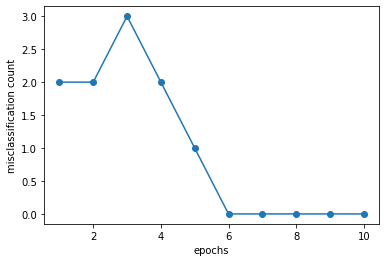

In [6]:
plt.plot(
    range(1, len(p.errors) + 1),
    p.errors,
    marker='o',
)
plt.xlabel('epochs')
plt.ylabel('misclassification count')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


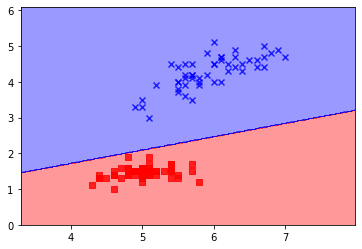

In [35]:
from matplotlib.colors import ListedColormap
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
resolution = 0.02
color_count = len(numpy.unique(targets))
c_map = ListedColormap(colors[:color_count])
sample_extent = [
    (samples[:, dim].min() - 1, samples[:, dim].max() + 1)
    for dim in (0, 1)
]
grid = numpy.meshgrid(
    numpy.arange(*sample_extent[0], resolution),
    numpy.arange(*sample_extent[1], resolution),
)
predictions = p.predict(
    numpy.array([
        grid[0].ravel(),
        grid[1].ravel()
    ]).T
)
predictions = predictions.reshape(grid[0].shape)

plt.contourf(
    grid[0],
    grid[1],
    predictions,
    alpha=0.4,
    cmap=c_map
)
plt.xlim(grid[0].min(), grid[0].max())
plt.ylim(grid[1].min(), grid[1].max())
for idx, target in enumerate(numpy.unique(targets)):
    plt.scatter(
        x=samples[targets == target, 0],
        y=samples[targets == target, 1],
        c=c_map(idx),
        alpha=0.8,
        marker=markers[idx],
        label=target
    )
plt.show()